In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


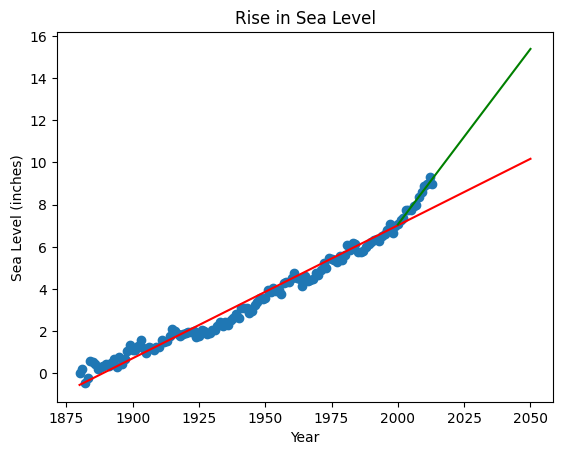

In [39]:
plt.scatter(data=df, x='Year', y='CSIRO Adjusted Sea Level')

#line of best fit 1
slope, intercept, r, p, se = linregress(df.Year, df['CSIRO Adjusted Sea Level'])
x_fit = pd.Series(range(1880, 2051))
plt.plot(x_fit, x_fit*slope + intercept, c='r')

#line of best fit 2
df2 = df[df.Year >= 2000]
slope2, intercept2, r2, p2, se2 = linregress(df2.Year, df2['CSIRO Adjusted Sea Level'])
x_fit2 = pd.Series(range(2000, 2051))
plt.plot(x_fit2, x_fit2*slope2 + intercept2, c='g')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.show()